In [34]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [35]:
df = pd.read_csv('/content/sample_data/Electro_music_on_Spotify.csv')
df.head()

,track_name,track_id,track_popularity,track_number,explicit,available_markets,artists_names,artists_ids,album_id,main_artist_id,...,positions_and_years_data,dj_score,release_year,release_month,track_name_length,main_artist_name_length,album_name_length,available_markets_count,artists_count,cover_id
0,God Is A Dancer,6mIrY9axk9DkBCk4eHXL6c,41,1,False,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'Mabel']","['2o5jDhtHVPhrJdv3cEQ99Z', '1MIVXf74SZHmTIp4V4...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,15,6,19,106,2,ab67616d00001e029759d6dfa2c19091814fccb3
1,Nothing Really Matters,39TATbzOKDwiWdrmuQBLGK,40,2,False,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'Becky Hill']","['2o5jDhtHVPhrJdv3cEQ99Z', '4EPJlUEBy49EX1wuFO...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,22,6,19,106,2,ab67616d00001e029759d6dfa2c19091814fccb3
2,Ride,6GpoUPegO1TBbZCoE7FxZ7,38,3,True,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'The Kid Daytona', 'ROE']","['2o5jDhtHVPhrJdv3cEQ99Z', '1U77TS18o4qUO3bwq0...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,4,6,19,106,3,ab67616d00001e029759d6dfa2c19091814fccb3
3,Ritual,0teJO13Uua0AamcZ681qOd,51,4,False,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'Jonas Blue', 'Rita Ora']","['2o5jDhtHVPhrJdv3cEQ99Z', '1HBjj22wzbscIZ9sEb...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,6,6,19,106,3,ab67616d00001e029759d6dfa2c19091814fccb3
4,Jackie Chan,4vvnuJlgBeNVwq3TNmLMNX,69,5,True,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'Dzeko', 'Preme', 'Post Malone']","['2o5jDhtHVPhrJdv3cEQ99Z', '5vQfv3s2Z2SRdPZKr8...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,11,6,19,106,4,ab67616d00001e029759d6dfa2c19091814fccb3


In [36]:
df.shape

(57459, 50)

In [37]:
# Remove unwanted columns
df = df.drop(columns=['track_id', 'track_popularity', 'explicit' ,'track_number', 'artists_ids', 'album_id', 'main_artist_id',
                      'album_release_date', 'total_tracks', 'type', 'image_url', 'album_label',
                      'born_or_founded_in', 'positions_and_years_data', 'artists_count', 'album_name_length',
                      'track_name_length', 'cover_id', 'followers', 'album_popularity', 'available_markets',
                      'main_artist_name_length', 'available_markets_count', 'duration_sec', 'time_signature',
                      'artist_popularity', 'lowest position', 'mean_position', 'position_std', 'best_position',
                      'times_in_rating', 'dj_score', 'release_year', 'release_month'])

In [38]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000
mean,0.630941,0.783748,5.537931,-6.996399,0.503107,0.077543,0.074231,0.408044,0.202281,0.346784,128.690268
std,0.140980,0.173368,3.601939,3.270847,0.499995,0.069602,0.167965,0.385608,0.176790,0.224326,15.932759
min,0.000000,0.000020,0.000000,-48.120000,0.000000,0.000000,0.000001,0.000000,0.007440,0.000000,0.000000
25%,0.547000,0.695000,2.000000,-8.570000,0.000000,0.041400,0.001280,0.001770,0.089200,0.161000,124.000000
50%,0.642000,0.827000,6.000000,-6.523000,1.000000,0.054100,0.008530,0.329000,0.122000,0.317000,128.000000
75%,0.734000,0.916000,9.000000,-4.785000,1.000000,0.081400,0.052700,0.835000,0.275000,0.500000,134.000000
max,0.989000,1.000000,11.000000,1.585000,1.000000,0.934000,0.995000,0.995000,0.990000,0.984000,248.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57459 entries, 0 to 57458
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        57459 non-null  object 
 1   artists_names     57459 non-null  object 
 2   danceability      57459 non-null  float64
 3   energy            57459 non-null  float64
 4   key               57459 non-null  int64  
 5   loudness          57459 non-null  float64
 6   mode              57459 non-null  int64  
 7   speechiness       57459 non-null  float64
 8   acousticness      57459 non-null  float64
 9   instrumentalness  57459 non-null  float64
 10  liveness          57459 non-null  float64
 11  valence           57459 non-null  float64
 12  tempo             57459 non-null  float64
 13  album_name        57459 non-null  object 
 14  genres            57459 non-null  object 
 15  artist_name       57459 non-null  object 
dtypes: float64(9), int64(2), object(5)
memor

In [40]:
df.columns.tolist()

['track_name',
 'artists_names',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'album_name',
 'genres',
 'artist_name']

In [41]:
df.drop_duplicates()
df.drop_duplicates(subset=['track_name', 'artists_names', 'artist_name'])

,track_name,artists_names,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_name,genres,artist_name
0,God Is A Dancer,"['Tiësto', 'Mabel']",0.773,0.747,1,-3.908,0,0.0820,0.02410,0.000006,0.3420,0.833,119.94,The London Sessions,"['big room', 'brostep', 'dance pop', 'dutch ed...",TIËSTO
1,Nothing Really Matters,"['Tiësto', 'Becky Hill']",0.732,0.847,5,-4.254,0,0.0426,0.00491,0.000002,0.2810,0.697,123.00,The London Sessions,"['big room', 'brostep', 'dance pop', 'dutch ed...",TIËSTO
2,Ride,"['Tiësto', 'The Kid Daytona', 'ROE']",0.734,0.855,11,-4.438,1,0.0412,0.03970,0.000278,0.1050,0.223,117.00,The London Sessions,"['big room', 'brostep', 'dance pop', 'dutch ed...",TIËSTO
3,Ritual,"['Tiësto', 'Jonas Blue', 'Rita Ora']",0.647,0.726,3,-4.390,0,0.0552,0.15700,0.000000,0.0844,0.769,115.00,The London Sessions,"['big room', 'brostep', 'dance pop', 'dutch ed...",TIËSTO
4,Jackie Chan,"['Tiësto', 'Dzeko', 'Preme', 'Post Malone']",0.747,0.833,3,-2.867,0,0.0450,0.37400,0.000000,0.0586,0.687,128.00,The London Sessions,"['big room', 'brostep', 'dance pop', 'dutch ed...",TIËSTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57453,Love Again (Extended Mix),"['Alok', 'VIZE', 'Alida']",0.765,0.734,5,-4.344,0,0.0642,0.02180,0.000925,0.2660,0.560,127.06,Love Again (Extended Mix),"['dance pop', 'edm', 'german dance', 'pop danc...",VIZE
57454,i miss u - VIZE Remix,"['Jax Jones', 'Au/Ra', 'VIZE']",0.699,0.848,9,-4.344,1,0.1840,0.00444,0.000000,0.1810,0.550,128.00,i miss u (VIZE Remix),"['dance pop', 'edm', 'german dance', 'pop danc...",VIZE
57456,White Lies,"['VIZE', 'Tokio Hotel']",0.839,0.751,1,-5.207,0,0.0924,0.17700,0.000000,0.0670,0.525,128.00,White Lies,"['dance pop', 'edm', 'german dance', 'pop danc...",VIZE
57457,Brother Louie,"['VIZE', 'Imanbek', 'Dieter Bohlen', 'Leony']",0.866,0.744,6,-3.988,0,0.1900,0.10200,0.000014,0.1210,0.870,117.00,Brother Louie,"['dance pop', 'edm', 'german dance', 'pop danc...",VIZE


In [42]:
all_columns = df.columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [43]:
df_main_columns = df[all_columns]
df_numerical_data = df[numerical_columns]
df_numerical_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.773,0.747,1,-3.908,0,0.0820,0.02410,0.000006,0.3420,0.833,119.94
1,0.732,0.847,5,-4.254,0,0.0426,0.00491,0.000002,0.2810,0.697,123.00
2,0.734,0.855,11,-4.438,1,0.0412,0.03970,0.000278,0.1050,0.223,117.00
3,0.647,0.726,3,-4.390,0,0.0552,0.15700,0.000000,0.0844,0.769,115.00
4,0.747,0.833,3,-2.867,0,0.0450,0.37400,0.000000,0.0586,0.687,128.00
...,...,...,...,...,...,...,...,...,...,...,...
57454,0.699,0.848,9,-4.344,1,0.1840,0.00444,0.000000,0.1810,0.550,128.00
57455,0.699,0.848,9,-4.344,1,0.1840,0.00444,0.000000,0.1810,0.550,128.00
57456,0.839,0.751,1,-5.207,0,0.0924,0.17700,0.000000,0.0670,0.525,128.00
57457,0.866,0.744,6,-3.988,0,0.1900,0.10200,0.000014,0.1210,0.870,117.00


In [44]:
df_num_x = df_numerical_data.to_numpy()
kmeans = KMeans(n_clusters=1000, init='k-means++', max_iter=300, n_init='auto', random_state=0)
kmeans.fit(df_num_x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("Cluster Assignments:", labels)
print("Centroids:", centroids)

Cluster Assignments: [712   3 989 ... 221 602 435]
Centroids: [[6.73897436e-01 8.05147436e-01 1.06282051e+01 ... 1.79733974e-01
  3.35557692e-01 1.29798077e+02]
 [6.17693878e-01 7.13714286e-01 9.38775510e-01 ... 1.88932653e-01
  4.72755102e-01 9.02114286e+01]
 [5.10102564e-01 8.02128205e-01 4.87179487e-01 ... 1.44443590e-01
  4.58920513e-01 1.69838462e+02]
 ...
 [5.78684211e-01 7.33210526e-01 8.05263158e+00 ... 2.29331579e-01
  4.68052632e-01 8.59810526e+01]
 [6.60402174e-01 7.48858696e-01 9.00000000e+00 ... 1.50886957e-01
  2.62484783e-01 1.27934783e+02]
 [7.01942857e-01 6.88742857e-01 2.85714286e-01 ... 2.39914286e-01
  4.57808571e-01 1.09412286e+02]]


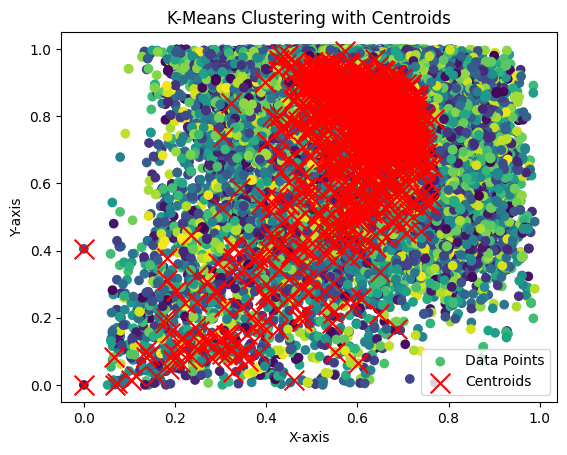

In [45]:
plt.scatter(df_num_x[:, 0], df_num_x[:, 1], c=labels, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red', label='Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.show()

In [46]:
current_song_name = 'Party Time'
result = df.query('track_name == @current_song_name')[numerical_columns].to_numpy()#.reshape(1, -1)
print(result)

[[ 6.350e-01  8.780e-01  0.000e+00 -4.754e+00  1.000e+00  7.000e-02
   1.030e-02  5.380e-01  3.380e-01  4.140e-01  1.250e+02]
 [ 6.350e-01  8.780e-01  0.000e+00 -4.754e+00  1.000e+00  7.000e-02
   1.030e-02  5.380e-01  3.380e-01  4.140e-01  1.250e+02]]


In [47]:
predicted_clusters = kmeans.predict(result)
print("Predicted Clusters for New Data:", predicted_clusters)

Predicted Clusters for New Data: [31 31]


In [48]:
# Find the nearest element to the centroid of cluster
cluster_index = predicted_clusters[0]
cluster_points = df_num_x[labels == cluster_index]
cluster_centroid = centroids[cluster_index]
distances = np.linalg.norm(cluster_points - cluster_centroid, axis=1)

# Find the index of the nearest point
nearest_index = np.argmin(distances)

# Print the nearest point
print(f"Nearest point to cluster {cluster_index} centroid: {cluster_points[nearest_index]}")

Nearest point to cluster 31 centroid: [ 8.45e-01  9.01e-01  0.00e+00 -5.25e+00  1.00e+00  5.03e-02  9.61e-05
  4.41e-01  3.84e-02  2.94e-01  1.25e+02]


In [49]:
# Find row where specified columns match target values
match = (df[numerical_columns] == cluster_points[nearest_index].tolist()).all(axis=1)
similar_track_name = df_main_columns[match].iloc[0]['track_name']

# Compare features of current song and next recommended song
df_main_columns.query("track_name in [@similar_track_name, @current_song_name]")

,track_name,artists_names,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_name,genres,artist_name
29,Party Time,"['Tiësto', 'SWACQ']",0.635,0.878,0,-4.754,1,0.0700,0.010300,0.538,0.3380,0.414,125.0,Together,"['big room', 'brostep', 'dance pop', 'dutch ed...",TIËSTO
40,Party Time,"['Tiësto', 'SWACQ']",0.635,0.878,0,-4.754,1,0.0700,0.010300,0.538,0.3380,0.414,125.0,Together,"['big room', 'brostep', 'dance pop', 'dutch ed...",TIËSTO
56107,Sacudelo,"['Green Velvet', 'Joeski']",0.845,0.901,0,-5.250,1,0.0503,0.000096,0.441,0.0384,0.294,125.0,Sacudelo,"['bass house', 'deep house', 'house', 'minimal...",GREEN VELVET
